# Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [2]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis

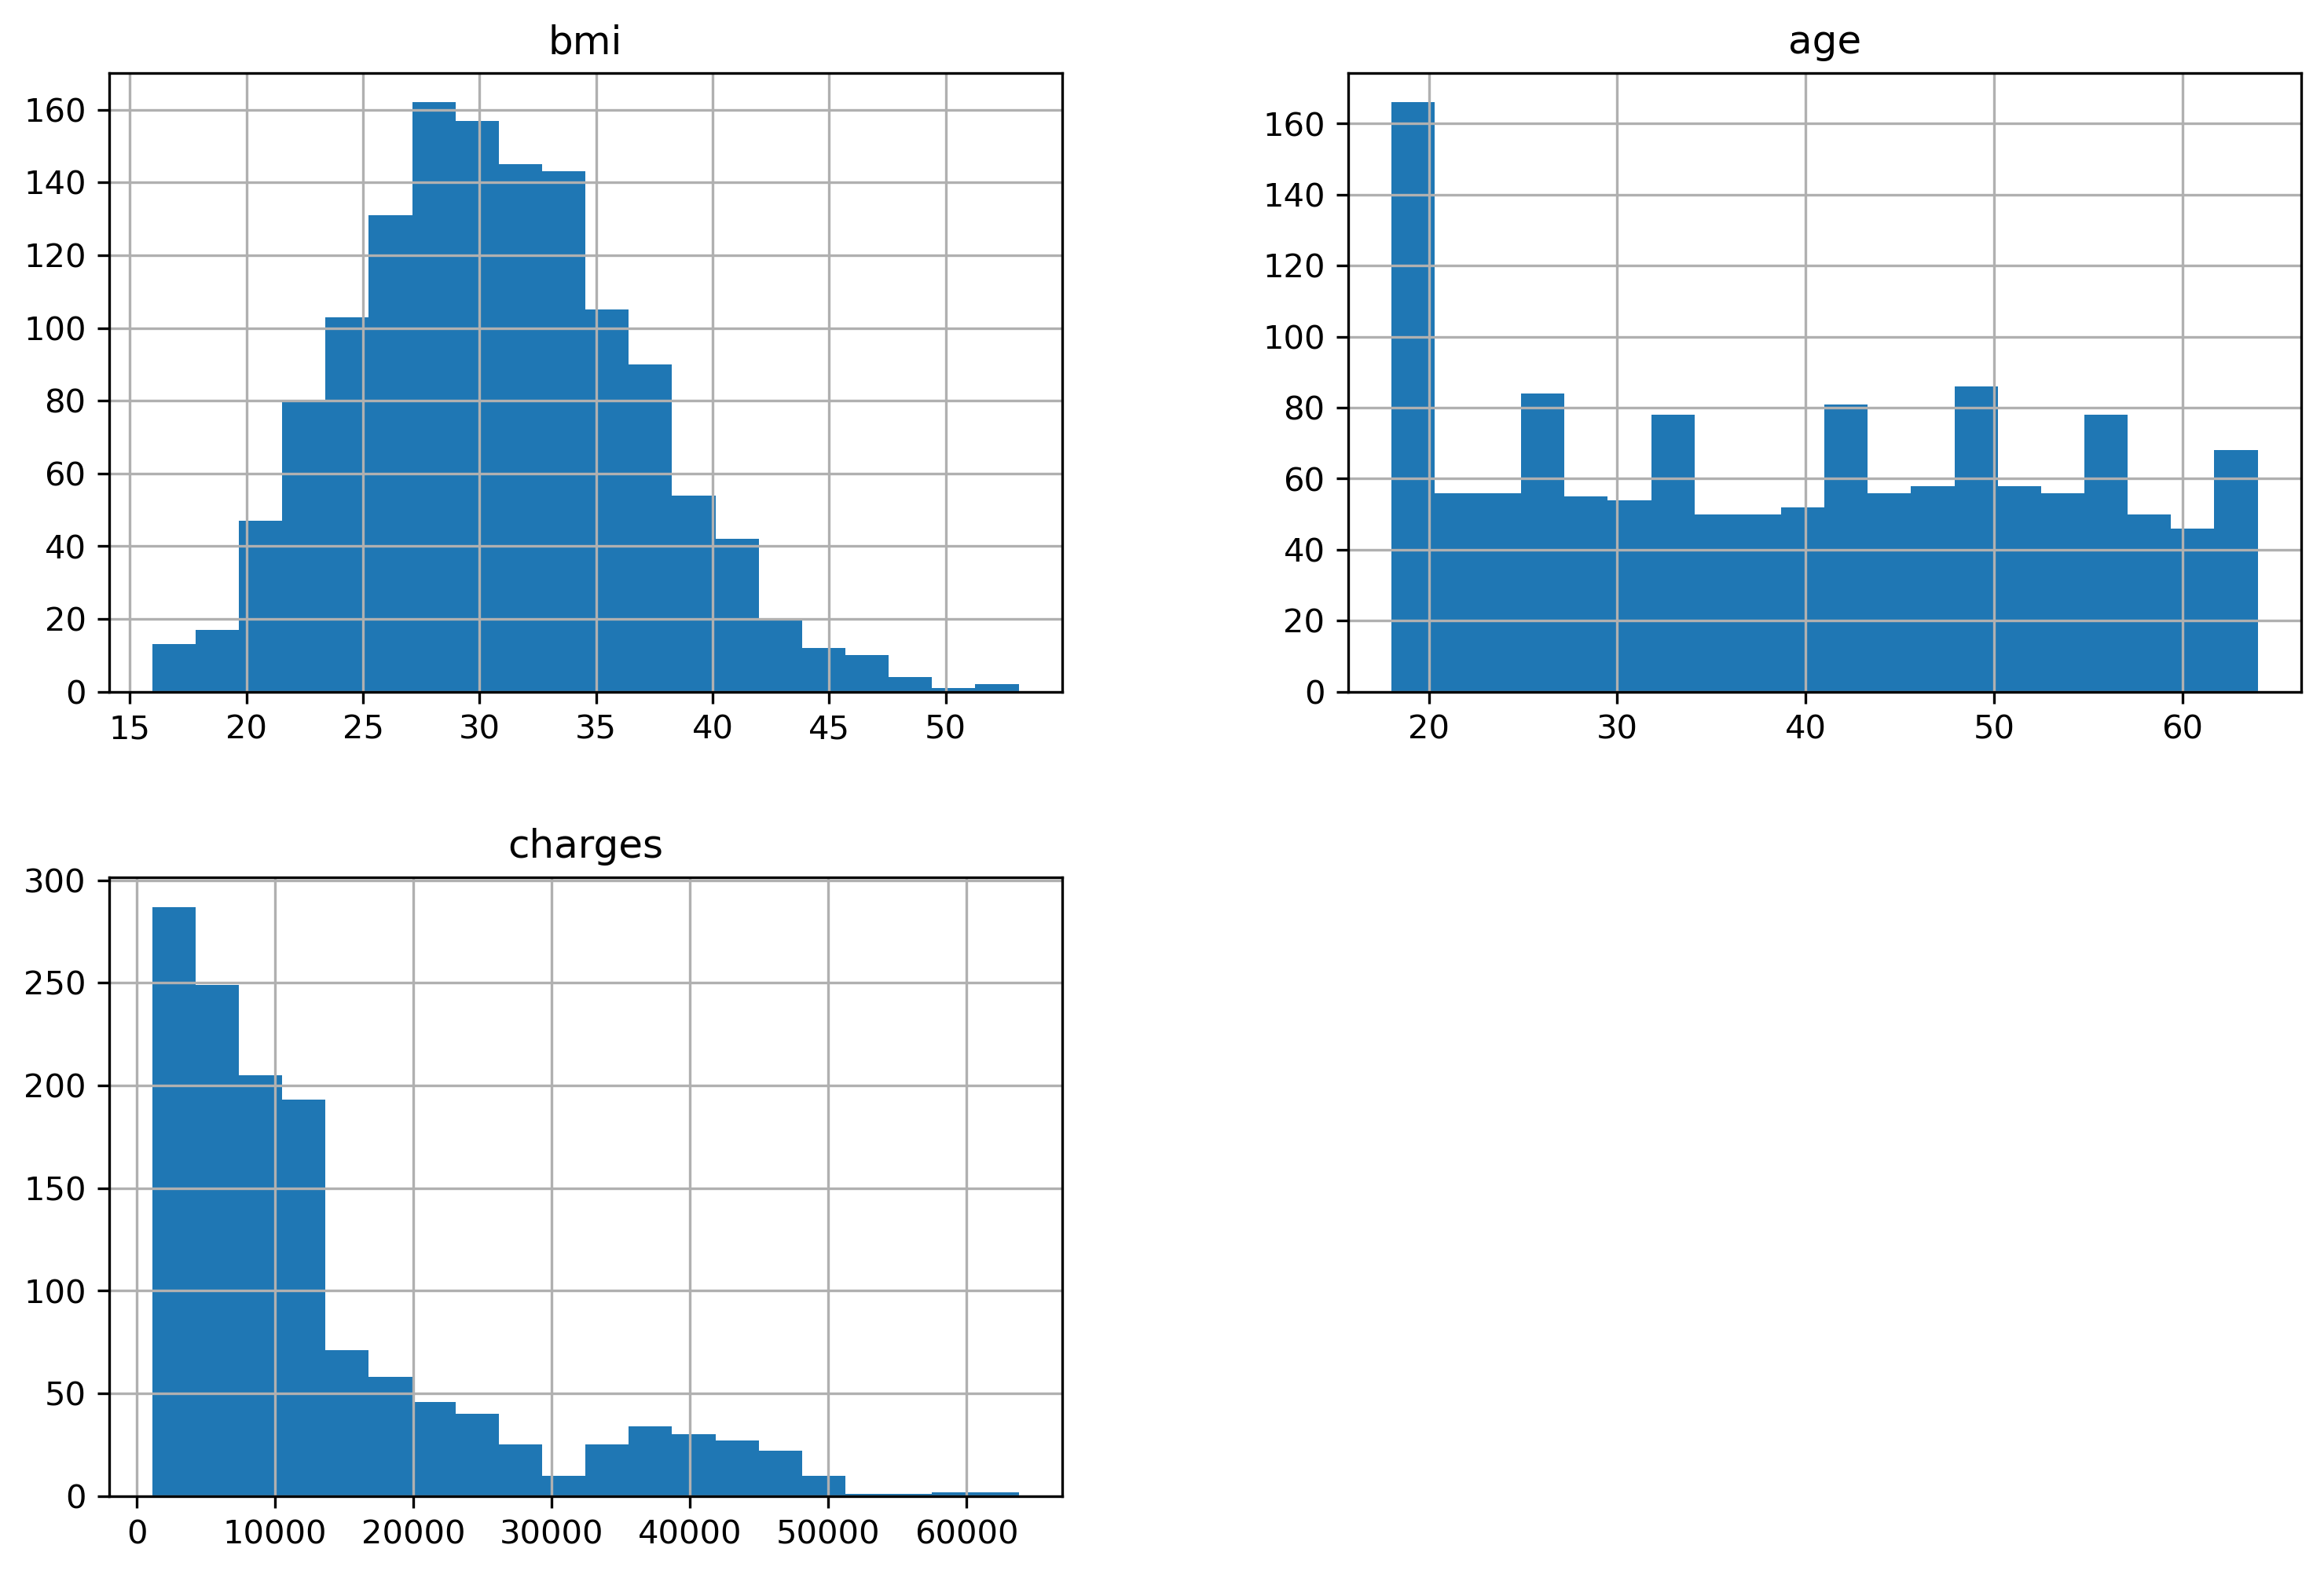

In [4]:
numeric = ['bmi', 'age', 'charges']

data[numeric].hist(bins=20, figsize = (12,8))
plt.show()

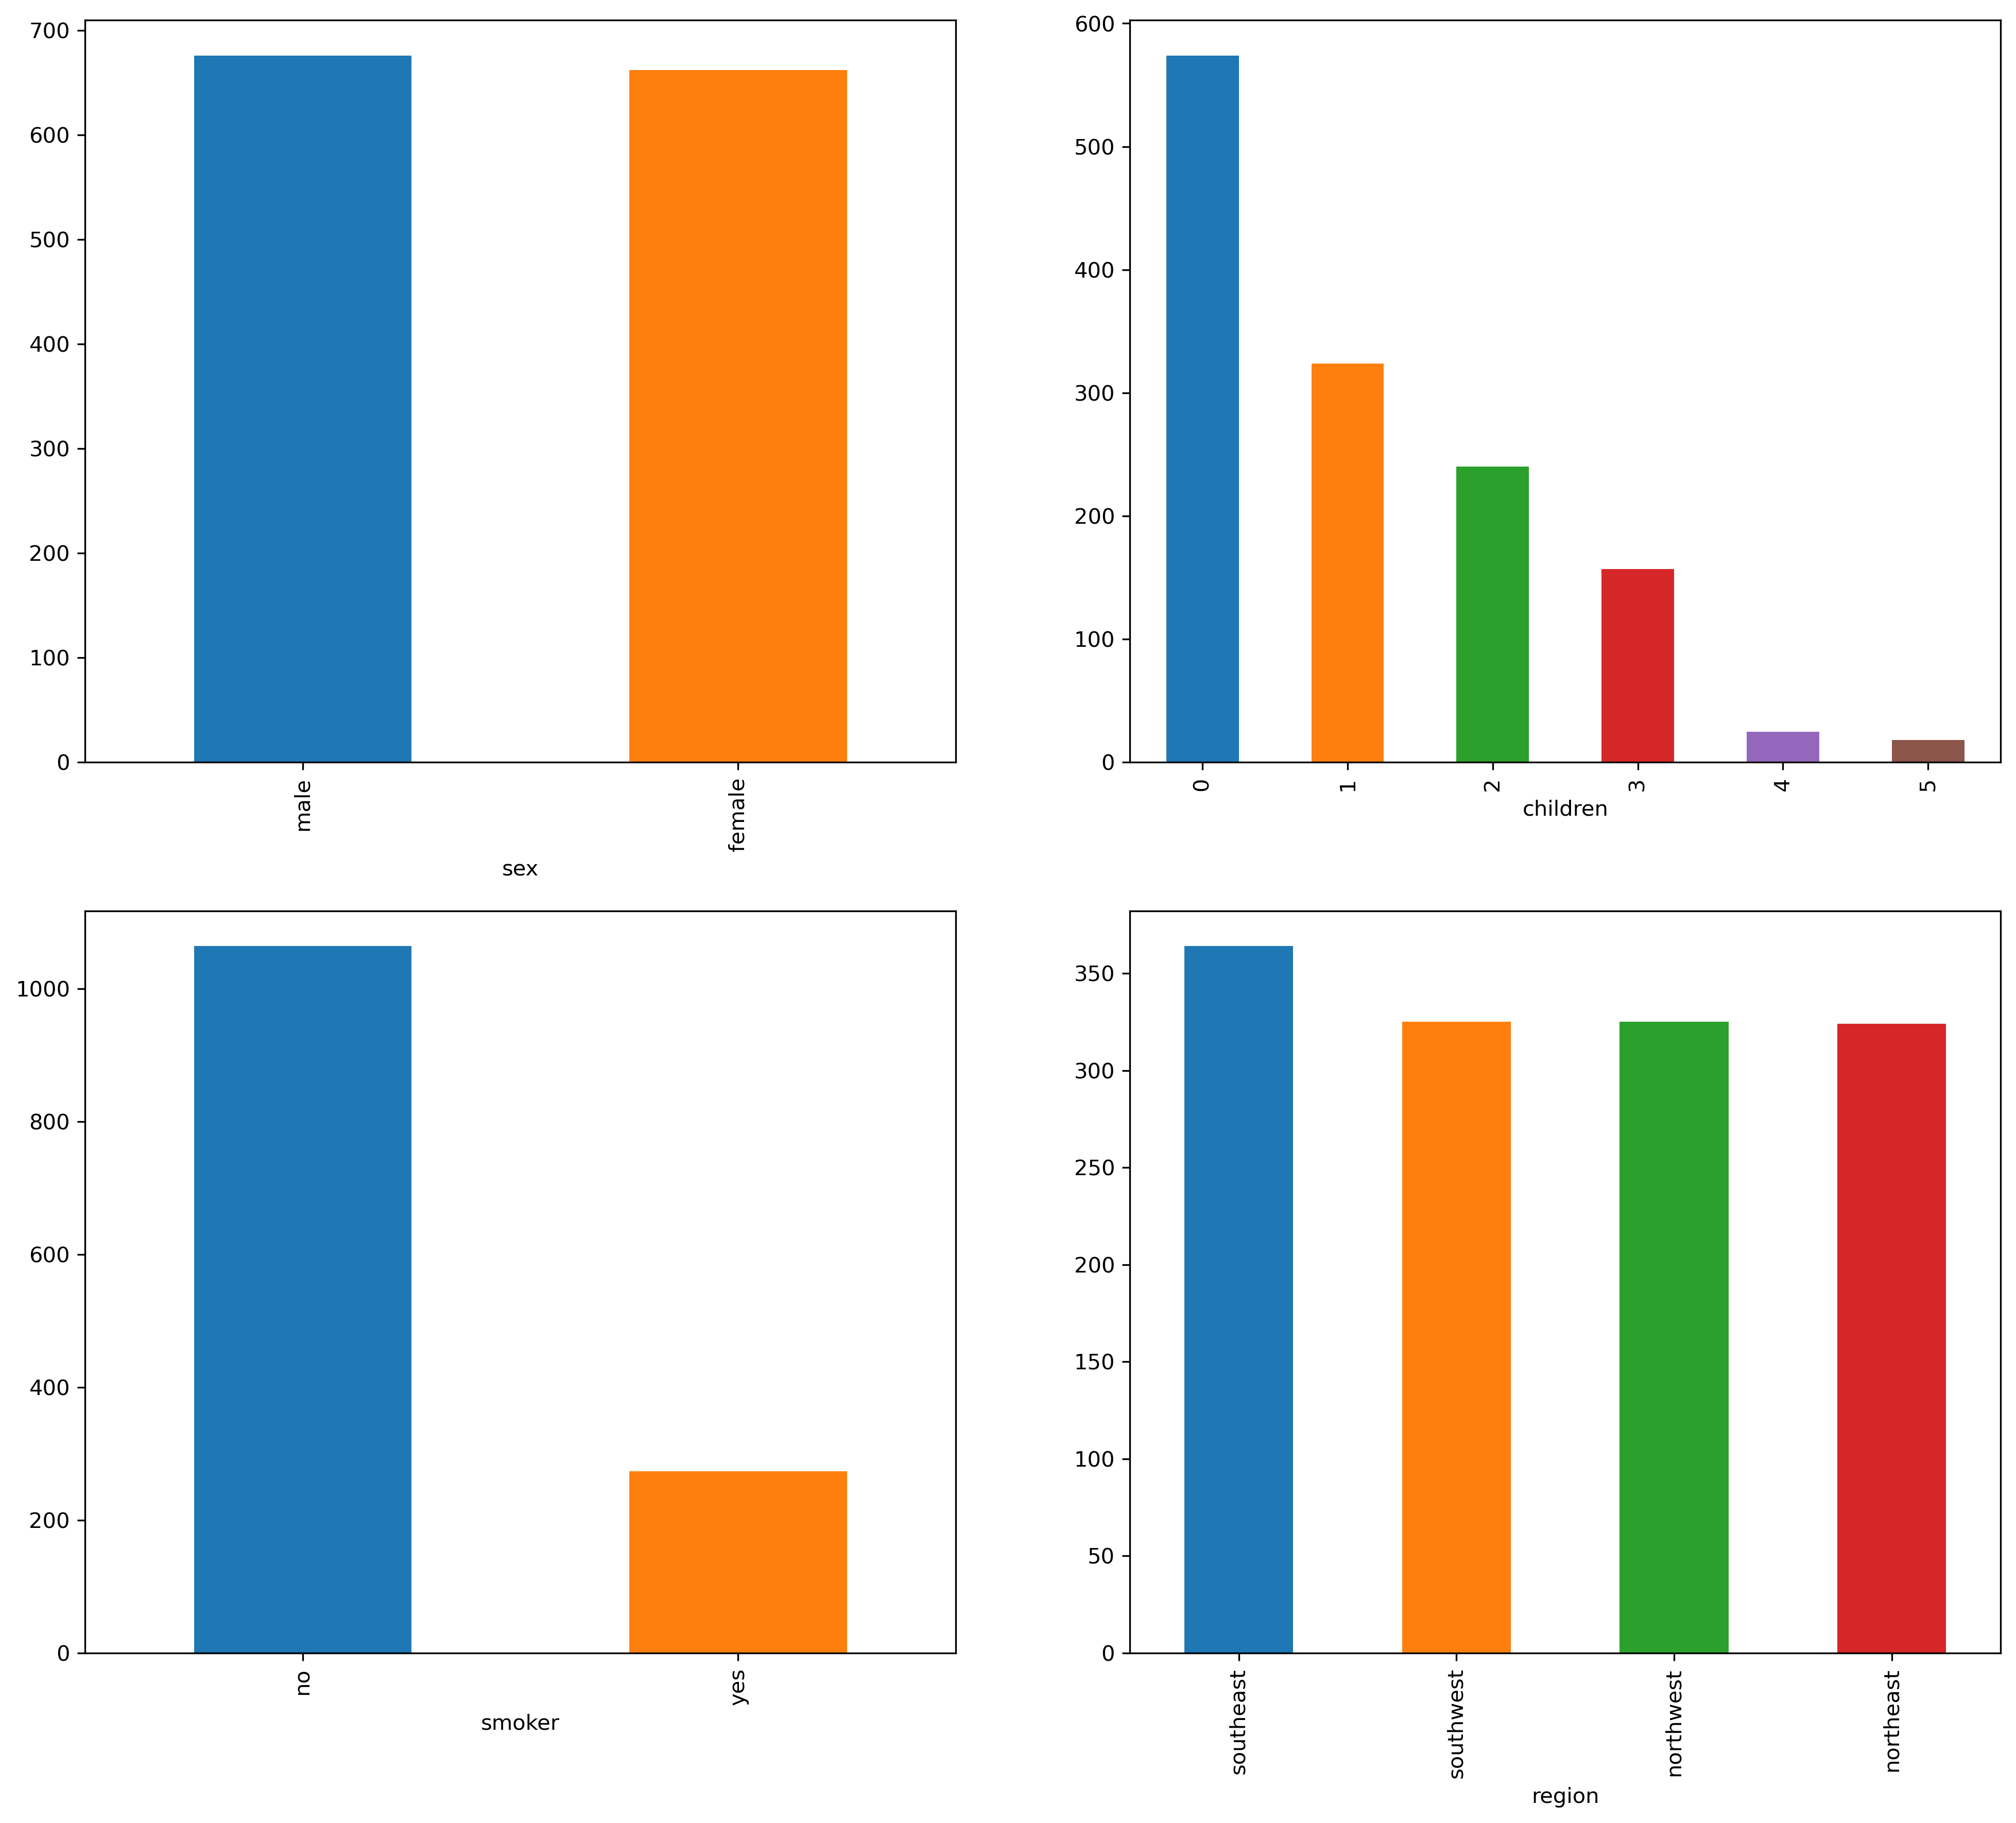

In [5]:
categorical = ['sex', 'children', 'smoker', 'region']
color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

fig, axes = plt.subplots(2, 2, figsize = (16,14))

for ax, col in zip(axes.flatten(), categorical) :
    data[col].value_counts().plot(kind = 'bar', ax = ax, color = color)
    ax.set_xlabel(col)

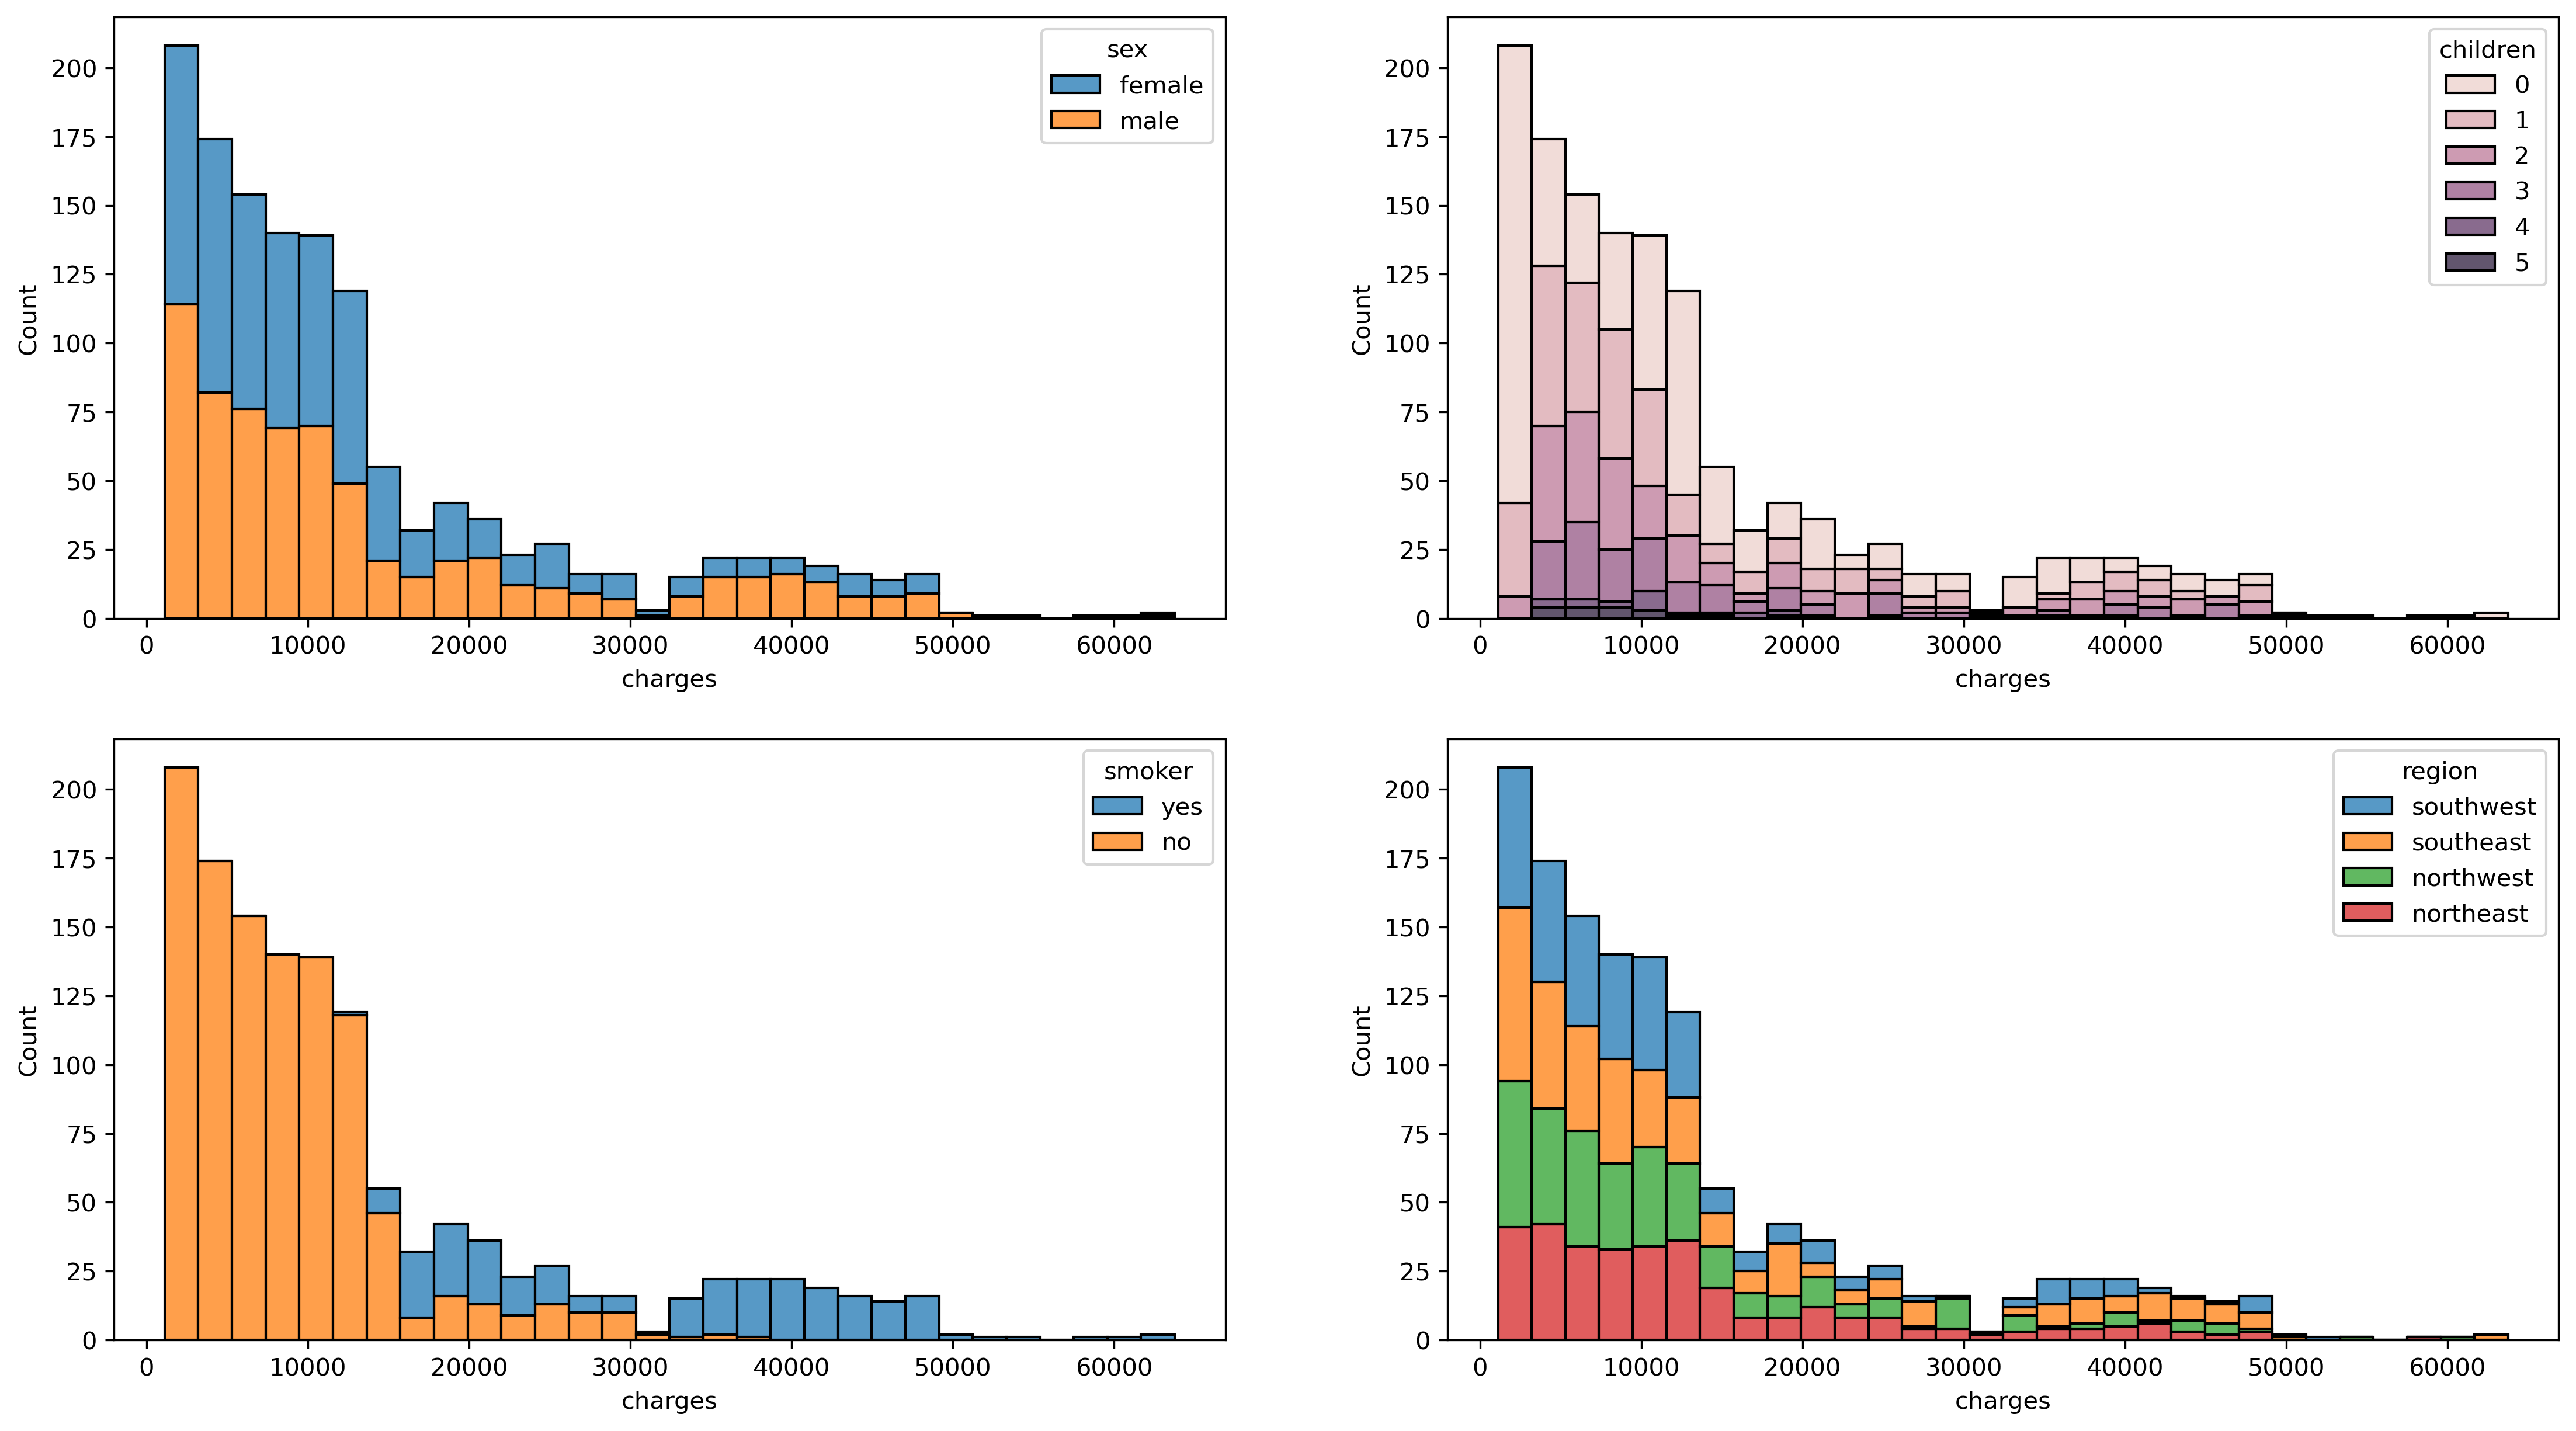

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))
for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data, x='charges', hue=col,
               multiple='stack', ax=ax)

### Initializing the PyCaret Environment

In [8]:
reg = setup(data=data, target='charges', train_size = 0.8, session_id = 7402,
            normalize = True, transform_target = True)

,Description,Value
0,session_id,7402
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1070, 14)"


In [10]:
get_config('X')

,age,bmi,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.455660,-0.451464,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.527447,0.497805,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.809580,0.373284,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.450646,-1.291574,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.522433,-0.292983,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.769728,0.045002,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,-1.527447,0.198632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1335,-1.527447,0.995887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1336,-1.312087,-0.791066,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Comparing Regression Models

In [11]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2228.3073,22366166.0431,4694.6852,0.8388,0.3815,0.1825,0.0190
rf,Random Forest Regressor,2324.5973,22930453.3026,4756.0987,0.8357,0.4093,0.2075,0.0830
ada,AdaBoost Regressor,3214.8677,23253713.5464,4798.6401,0.8336,0.4748,0.4201,0.0110
lightgbm,Light Gradient Boosting Machine,2481.4551,23807895.5372,4848.5480,0.8293,0.4121,0.2112,0.0420
catboost,CatBoost Regressor,2501.7977,25137467.0159,4986.1469,0.8181,0.4096,0.2009,0.7050
et,Extra Trees Regressor,2396.9477,25576276.4484,5029.7565,0.8150,0.4309,0.2179,0.0790
xgboost,Extreme Gradient Boosting,2765.0618,28024194.6000,5252.5545,0.8003,0.4469,0.2535,0.1310
dt,Decision Tree Regressor,3039.1866,42688501.6787,6480.2587,0.6969,0.5136,0.3283,0.0090
omp,Orthogonal Matching Pursuit,5645.3007,59119658.9144,7679.3608,0.5758,0.6831,0.6880,0.0080
ridge,Ridge Regression,4085.1608,61549085.2000,7713.2736,0.5577,0.4400,0.2720,0.0080


### Creating a Model

In [14]:
model = create_model('gbr', cross_validation = True, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2266.6720,24156463.2620,4914.9225,0.8423,0.3728,0.1644
1,2493.5814,29371408.4248,5419.5395,0.7390,0.4454,0.2408
2,2399.6386,20797983.7137,4560.4806,0.8631,0.4126,0.1942
3,2427.7672,23585967.3457,4856.5386,0.8295,0.3865,0.1725
4,2020.6569,17527336.4770,4186.5662,0.8452,0.4177,0.2019
5,1939.0303,16527141.2472,4065.3587,0.9105,0.2847,0.1497
6,2709.2840,32348910.6359,5687.6103,0.8193,0.4113,0.2011
7,1886.5484,16072231.3410,4009.0188,0.8952,0.2972,0.1690
8,1820.9326,16911239.8459,4112.3278,0.8323,0.3232,0.1619
9,2318.9615,26362978.1375,5134.4891,0.8119,0.4634,0.1692


### Tuning a Model

In [46]:
params = {
        'learning_rate': [0.01, 0.02, 0.05],
        'max_depth': [1,2, 3, 4, 5, 6, 7, 8],
        'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
        'n_estimators' : [100, 200, 300, 400, 500, 600]
    }

tuned_model = tune_model(model, optimize = 'RMSE', fold = 10,
                       custom_grid = params, n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2228.2900,23807413.9695,4879.2842,0.8445,0.3720,0.1716
1,2407.5448,28478326.7382,5336.5089,0.7470,0.4283,0.2222
2,2385.6998,20665196.0318,4545.8988,0.8640,0.4063,0.1946
3,2321.6600,22621838.3082,4756.2420,0.8365,0.3850,0.1712
4,1992.3956,17684656.2177,4205.3129,0.8438,0.4157,0.1941
5,2001.9579,17433418.2821,4175.3345,0.9056,0.2863,0.1560
6,2559.9093,29711261.4079,5450.8037,0.8340,0.4089,0.1989
7,1878.3218,15815335.0682,3976.8499,0.8969,0.2992,0.1784
8,1779.7328,16135769.5133,4016.9353,0.8400,0.3220,0.1660
9,2420.3811,27020967.2108,5198.1696,0.8072,0.4650,0.1771


### Plotting the Model

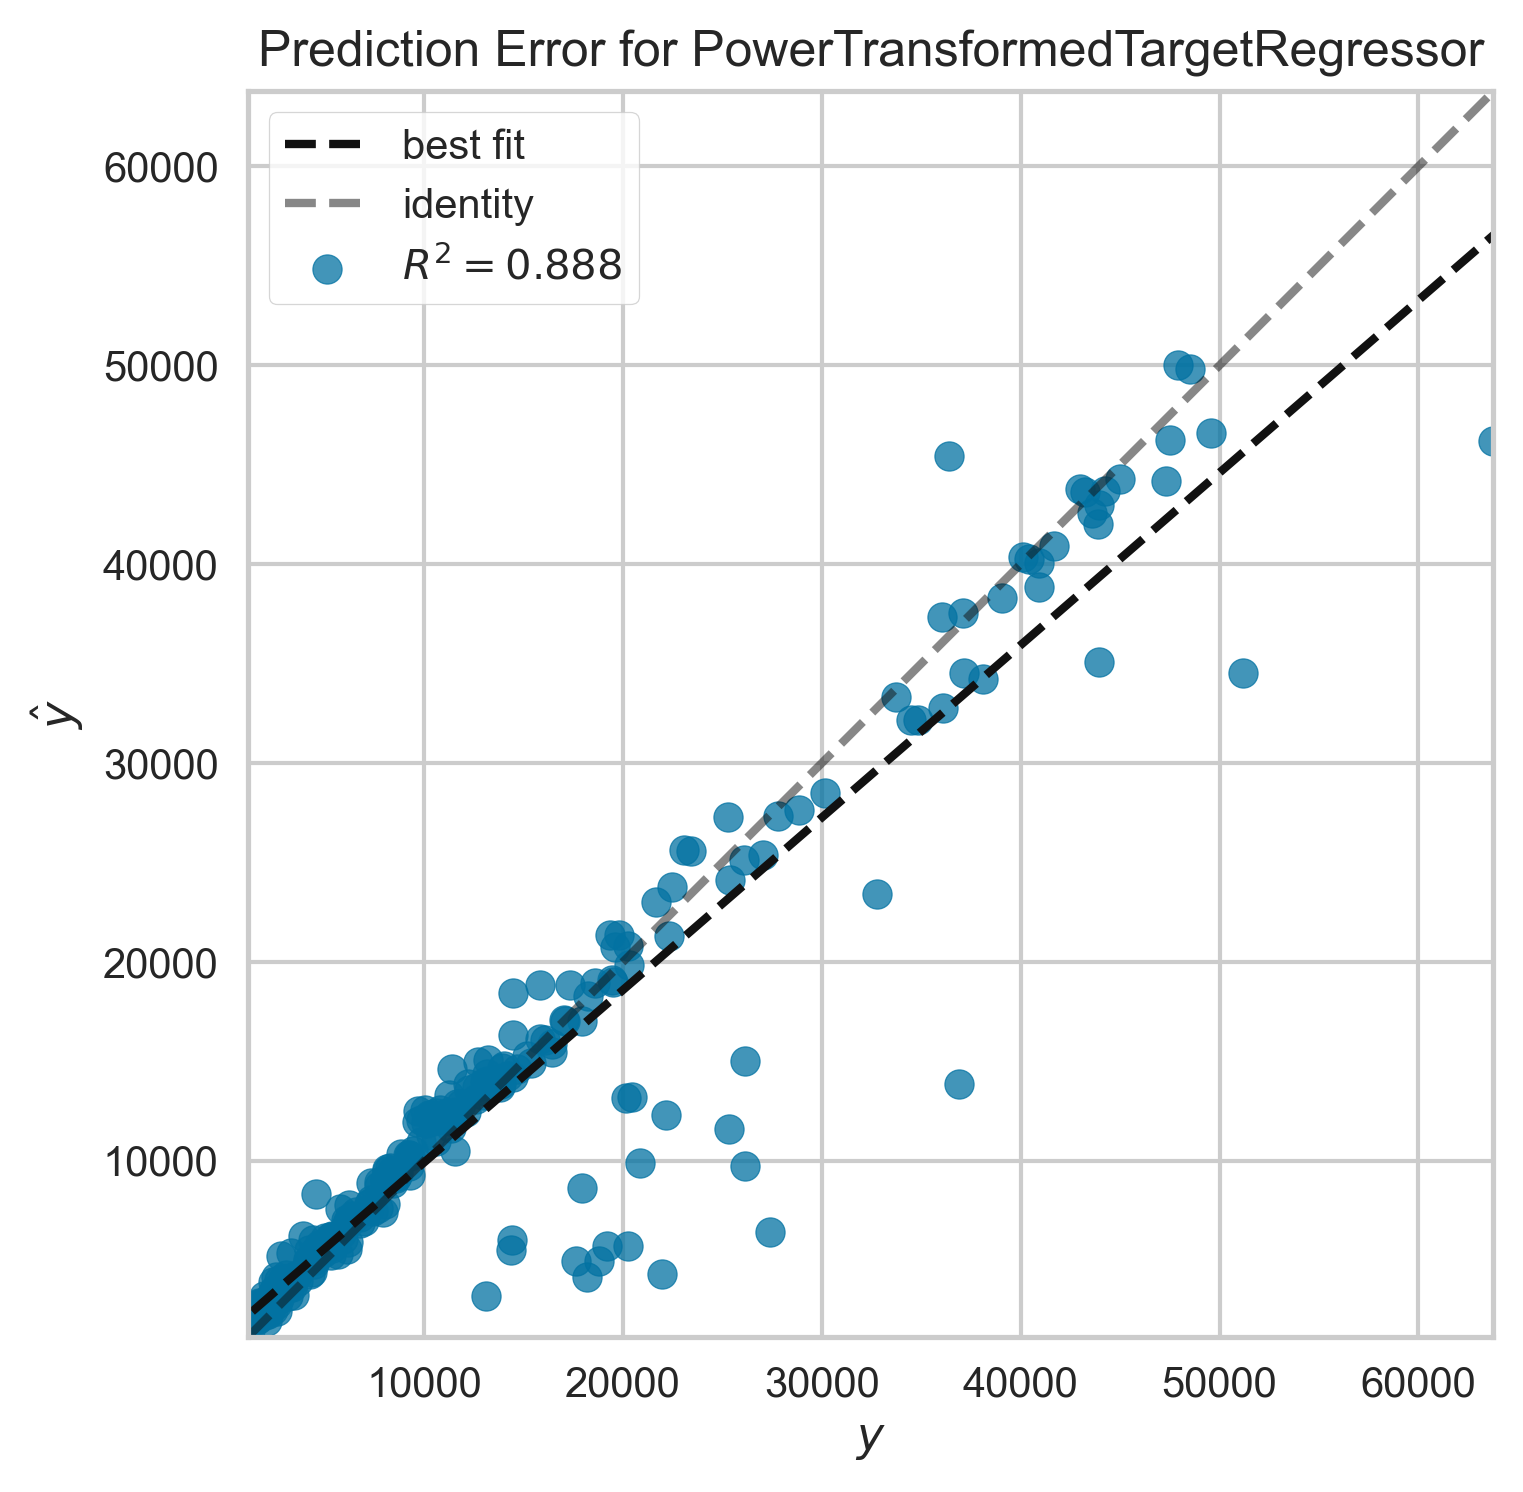

In [48]:
plot_model(tuned_model, plot='error')

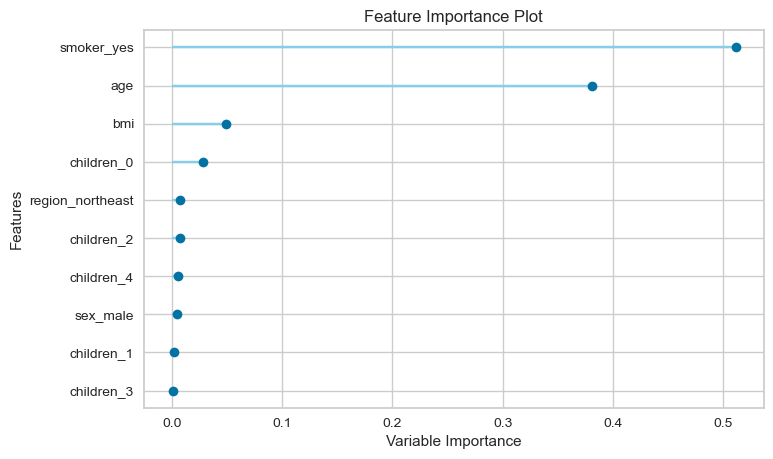

In [33]:
plot_model(tuned_model, plot='feature')

### Making Predictions on New Data

In [64]:
cols =  ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

records = [
       [30, 'male', 20, 0, 'no', 'southeast'],
       [30, 'male', 20, 0, 'yes', 'southeast'],
       [30, 'male', 35, 0, 'yes', 'southeast'],
       [70, 'male', 35, 0, 'yes', 'southeast'],
       [30, 'female', 20, 0, 'no', 'southeast'],
       [30, 'female', 20, 0, 'yes', 'southeast'],
       [30, 'female', 35, 0, 'yes', 'southeast'],
       [70, 'female', 35, 0, 'yes', 'southeast'] ]

new_data = pd.DataFrame(data = records, columns = cols)

predict_model(final_model, new_data)

,age,sex,bmi,children,smoker,region,Label
0,30,male,20,0,no,southeast,3672.043231
1,30,male,20,0,yes,southeast,17089.685887
2,30,male,35,0,yes,southeast,36784.238995
3,70,male,35,0,yes,southeast,44830.845658
4,30,female,20,0,no,southeast,3881.191714
5,30,female,20,0,yes,southeast,17129.487180
6,30,female,35,0,yes,southeast,37167.207415
7,70,female,35,0,yes,southeast,45445.640834


### Finalizing and Saving the Model

In [62]:
final_model = finalize_model(tuned_model)

save_model(final_model, 'regression_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min